<a href="https://colab.research.google.com/github/atlas-github/fstep_19/blob/master/intro_to_bigdata%26ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

1. What is [Google Colab](https://research.google.com/colaboratory/faq.html)?
2. Click Connect
3. Try uploading a document
4. Explain Runtime types
5. Try a few settings

#Upload and view a spreadsheet

In [1]:
import pandas as pd
df = pd.read_csv("sample-users.csv")
df

,user_id,birth_year,country,user_settings,plan
0,user_0,1989,Poland,1,Regular
1,user_1,1975,United Kingdom,0,Regular
2,user_2,1987,Poland,0,Regular
3,user_3,1994,France,0,Regular
4,user_4,1985,United Kingdom,0,Regular
...,...,...,...,...,...
16271,user_19425,1994,Ireland,0,Regular
16272,user_19426,1977,Estonia,0,Regular
16273,user_19427,1991,Poland,0,Regular
16274,user_19428,1984,United Kingdom,0,Regular


#Build a simple [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)


In [2]:
import numpy as np 

table = pd.pivot_table(df, index = ['country'], values = 'user_settings', columns = ['plan'], aggfunc = 'count')
table

plan,Premium,Regular,Special
country,,,
Denmark,22,409,15
Estonia,31,939,21
France,101,1925,84
Ireland,41,1137,36
Lithuania,10,630,6
Malta,17,510,21
Poland,41,2231,34
Portugal,16,577,11
Romania,78,966,52


#P1: Compile several worksheets using [read_excel()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)

In [7]:
df1 = pd.read_excel('sample-user_parts.xlsx', sheet_name='Sheet1')
df1

,user_id,birth_year,country,user_settings,plan
0,user_0,1989,Poland,1,Regular
1,user_1,1975,United Kingdom,0,Regular
2,user_2,1987,Poland,0,Regular
3,user_3,1994,France,0,Regular
4,user_4,1985,United Kingdom,0,Regular
...,...,...,...,...,...
3993,user_4654,1992,United Kingdom,0,Regular
3994,user_4655,1996,United Kingdom,1,Premium
3995,user_4656,1994,Poland,0,Regular
3996,user_4657,1967,Ireland,1,Regular


In [8]:
df2 = pd.concat(pd.read_excel('sample-user_parts.xlsx', sheet_name=None), ignore_index=True)
df2

,user_id,birth_year,country,user_settings,plan
0,user_0,1989,Poland,1,Regular
1,user_1,1975,United Kingdom,0,Regular
2,user_2,1987,Poland,0,Regular
3,user_3,1994,France,0,Regular
4,user_4,1985,United Kingdom,0,Regular
...,...,...,...,...,...
16270,user_19425,1994,Ireland,0,Regular
16271,user_19426,1977,Estonia,0,Regular
16272,user_19427,1991,Poland,0,Regular
16273,user_19428,1984,United Kingdom,0,Regular


#P2: Extract table from pdf using [Tabula](https://pypi.org/project/tabula-py/)

In [9]:
!pip install tabula-py

     |████████████████████████████████| 11.7MB 4.5MB/s 


In [11]:
import tabula

# Read pdf into list of DataFrame
sample_list = tabula.read_pdf("cimb-2019-financial-statements.pdf", pages='5')

sample_list

[                                           Unnamed: 0  ...         2015
 0                                      Key Highlights  ...       RM’000
 1                    Consolidated Statement of Income  ...          NaN
 2                                    Operating income  ...   15,395,790
 3                                           Overheads  ...    9,248,978
 4                Profit before expected credit losses  ...    6,146,812
 5       Expected credit losses on loans, advances and  ...          NaN
 6                                           financing  ...    2,168,624
 7                    Profit before taxation and zakat  ...    3,913,993
 8                   Net profit for the financial year  ...    2,849,509
 9        Consolidated Statement of Financial Position  ...          NaN
 10                Gross loans, advances and financing  ...  297,822,144
 11                                       Total assets  ...  461,577,143
 12                           Deposits from custome

In [17]:
df_cimb = sample_list[0]
df_cimb

,Unnamed: 0,2019,2018,2017,2016,2015
0,Key Highlights,RM’000,RM’000,RM’000,RM’000,RM’000
1,Consolidated Statement of Income,NaN,NaN,NaN,NaN,NaN
2,Operating income,"17,795,879","17,381,968","17,626,496","16,065,255","15,395,790"
3,Overheads,"9,872,905","8,655,821","9,133,575","8,651,690","9,248,978"
4,Profit before expected credit losses,"7,922,974","8,726,147","8,492,921","7,413,565","6,146,812"
5,"Expected credit losses on loans, advances and",NaN,NaN,NaN,NaN,NaN
6,financing,"1,638,785","1,432,661","2,230,907","2,408,883","2,168,624"
7,Profit before taxation and zakat,"5,974,840","7,200,667","6,109,985","4,884,144","3,913,993"
8,Net profit for the financial year,"4,559,656","5,583,510","4,475,175","3,564,190","2,849,509"
9,Consolidated Statement of Financial Position,NaN,NaN,NaN,NaN,NaN


In [18]:
#clean header row

df_cimb = df_cimb.rename(columns = {"Unnamed: 0" : "Key Highlights"})
df1_cimb = df_cimb.drop([0])

#merge rows 5 & 6

df1_cimb = df1_cimb.replace(to_replace = "financing", value = "Expected credit losses on loans, advances and financing")
df2_cimb = df1_cimb.drop([5])

#merge rows 35 & 36

df2_cimb = df2_cimb.replace(to_replace = "– basic", value = "Earnings per share (sen)")
df3_cimb = df2_cimb.drop([35])

#replace NaNs
df3_cimb = df3_cimb.fillna('')
df3_cimb

,Key Highlights,2019,2018,2017,2016,2015
1,Consolidated Statement of Income,,,,,
2,Operating income,"17,795,879","17,381,968","17,626,496","16,065,255","15,395,790"
3,Overheads,"9,872,905","8,655,821","9,133,575","8,651,690","9,248,978"
4,Profit before expected credit losses,"7,922,974","8,726,147","8,492,921","7,413,565","6,146,812"
6,"Expected credit losses on loans, advances and ...","1,638,785","1,432,661","2,230,907","2,408,883","2,168,624"
7,Profit before taxation and zakat,"5,974,840","7,200,667","6,109,985","4,884,144","3,913,993"
8,Net profit for the financial year,"4,559,656","5,583,510","4,475,175","3,564,190","2,849,509"
9,Consolidated Statement of Financial Position,,,,,
10,"Gross loans, advances and financing","369,491,503","346,290,529","324,218,054","323,719,559","297,822,144"
11,Total assets,"573,245,655","534,089,043","506,499,532","485,766,887","461,577,143"


In [14]:
df3_cimb.to_csv("cimb-sample.csv")
from google.colab import files
files.download("cimb-sample.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#P3: Join tables using [pd.merge()]()

In [32]:
users = pd.read_csv("sample-users.csv")
users.head()

,user_id,birth_year,country,user_settings,plan
0,user_0,1989,Poland,1,Regular
1,user_1,1975,United Kingdom,0,Regular
2,user_2,1987,Poland,0,Regular
3,user_3,1994,France,0,Regular
4,user_4,1985,United Kingdom,0,Regular


In [33]:
devices = pd.read_csv("sample-devices.csv")
devices.head()

,brand,user_id
0,Android,user_3257
1,Apple,user_6809
2,Android,user_9144
3,Apple,user_3636
4,Android,user_5970


In [34]:
users_devices = users.merge(devices, on = "user_id")
users_devices

,user_id,birth_year,country,user_settings,plan,brand
0,user_0,1989,Poland,1,Regular,Apple
1,user_1,1975,United Kingdom,0,Regular,Apple
2,user_2,1987,Poland,0,Regular,Android
3,user_3,1994,France,0,Regular,Apple
4,user_4,1985,United Kingdom,0,Regular,Apple
...,...,...,...,...,...,...
16271,user_19425,1994,Ireland,0,Regular,Apple
16272,user_19426,1977,Estonia,0,Regular,Apple
16273,user_19427,1991,Poland,0,Regular,Android
16274,user_19428,1984,United Kingdom,0,Regular,Android


In [35]:
devices.merge(users, on = "user_id")

,brand,user_id,birth_year,country,user_settings,plan
0,Android,user_3257,1988,United Kingdom,0,Regular
1,Apple,user_6809,1994,Estonia,0,Regular
2,Android,user_9144,1993,United Kingdom,0,Premium
3,Apple,user_3636,2000,United Kingdom,0,Regular
4,Android,user_5970,1991,United Kingdom,0,Regular
...,...,...,...,...,...,...
16271,Apple,user_18696,1992,France,0,Regular
16272,Android,user_16188,1972,Poland,0,Regular
16273,Android,user_10190,1986,United Kingdom,0,Regular
16274,Android,user_14554,1994,France,0,Regular


#P4: Text functions

A categorical plot using Seaborn

#P5: Data analysis

#Visualize data using [Seaborn](https://seaborn.pydata.org/)

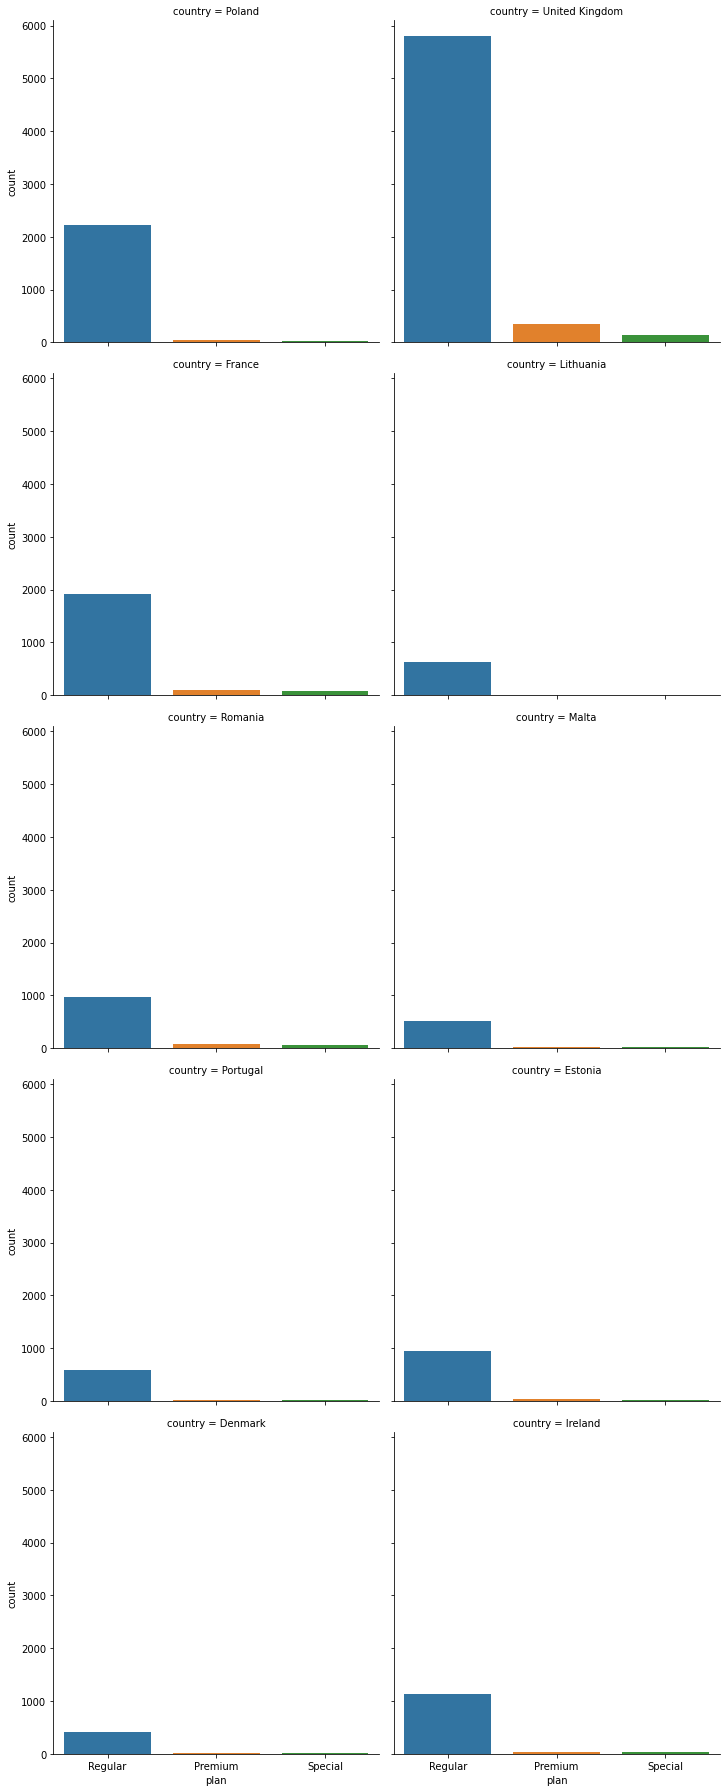

In [40]:
import seaborn as sns
plot1 = sns.catplot(x = "plan", col = "country", col_wrap = 2, data = users_devices, kind = "count")
plot1

#Logistic Regression